# Gaussian Mixture Model (GMM) and Expectation-Maximization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

## Generating Data

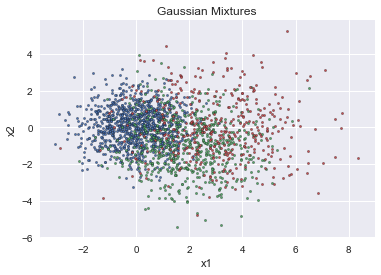

In [2]:
mu1, Sigma1 = np.array([0, 0]), np.eye(2)
mu2, Sigma2 = np.array([2, -1]), 2 * np.eye(2)
mu3, Sigma3 = np.array([3, 0]), 3 * np.eye(2)

X = np.vstack((np.random.multivariate_normal(mu1, Sigma1, size=1000),
               np.random.multivariate_normal(mu2, Sigma2, size=600),
               np.random.multivariate_normal(mu3, Sigma3, size=400)))

idx = np.split(np.arange(2000), [1000, 1600, 2000])[:-1]

for ii in idx:
    plt.scatter(X[ii, 0], X[ii, 1], s=5, edgecolors='k', linewidths=0.25) 

plt.title("Gaussian Mixtures")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

In [4]:
# x = np.linspace(-4, 8, 200)
# y = np.linspace(-6, 6, 200)
# xx, yy = np.meshgrid(x, y)
# 
# z = np.column_stack((xx.ravel(), yy.ravel()))
# X = np.array(0.5 * multivariate_normal(mu1, Sigma1).pdf(z)
#              + 0.3 * multivariate_normal(mu2, Sigma2).pdf(z)
#              + 0.2 * multivariate_normal(mu3, Sigma3).pdf(z))
# 
# Z = X.reshape(xx.shape)

In [5]:
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(xx, yy, Z, cmap=plt.cm.Spectral)
# ax.set_xlabel("x1")
# ax.set_ylabel("x2")
# plt.show()

# Expectation-Maximization

## Gaussian Mixtures

The Gaussian Mixture distribution is a linear superposition of Gaussians:

$$p(x) = \sum_{k=1}^{K} \pi_k {\cal N}(x \mid \mu_k, \Sigma_k)$$

We introduce a $K$-dimensional binary random variable $z$ (latent variable)
having a 1-of-$K$ representation such that
$z_k \in \{0, 1\}$ and $\sum_k z_k = 1$. So there are $K$ possible states.
The marginal distribution over $z$ in terms of the mixing coefficients $\pi_k$ is

$$p(z_k = 1) = \pi_k$$

where $0 \le \pi_k \le 1$ (prior probabilities) and $\sum_{k} \pi_k = 1$.

We can compute the conditional probability of $z$ given $x$.

$$\gamma_{k}
= \frac{\pi_k p (x \!\mid \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j p (x \!\mid \mu_j, \Sigma_j)}$$

If we have multiple observations $x_1, \dots, x_n$, then $\gamma_{nk}$ is the probability of data point $x_n$ beloning to cluster $k$. Also,

$$p(z) = \prod_k \pi_k^{z_k}$$

The conditional distribution of $x$ given $z$ is a Gaussian

$$p(x \mid z_k = 1) = p(x \mid \mu_k, \Sigma_k)$$

which can be also written as

$$p(x \mid z) = \prod_k {\cal N}(x \mid \mu_k, \Sigma_k)^{z_k}$$

## General EM Algorithm

We write the set of all model parameters $\theta$, and the log likelihood is given by

$$
\log p(X\mid \theta) = \log \left[ \sum_Z p(X, Z\mid \theta) \right]
$$

We call $\{X, Z\}$ the _complete data_ set, and refer to the actual observed data $X$ incomplete.


In the __E Step__ (Expectation Step), we use the current parameter values $\theta^{(t)}$ (step $t$) to find the posterior distribution, which then we use to find the expected complete-data log likelihood (ECLL) denoted by

$$
Q(\theta, \theta^{(t)}) = E [\log (Z, X \mid  \theta) \mid  X, \theta^{(t)}] 
= \sum_Z p(Z \mid X, \theta^{(i)}) \log p(X, Z\mid \theta)
$$

In the __M step__ (Maximization Step), we determine the parameter estimate $\theta$ by maximizing $Q$

$$
\theta^{(t+1)} \leftarrow \arg \max_\theta Q(\theta, \theta^{(t)} )
$$

### EM for Gaussian Mixtures

Now we apply EM to a GMM. The likelihood function for the complete data looks like

$$p(X, Z \mid  \mu, \Sigma, \pi)
= \prod_{n=1}^{N} \prod_{k=1}^{K} \pi_k^{z_{nk}} p (x_n \!\mid \mu_k \Sigma_k)^{z_{nk}}$$

Taking the logarithm, we have the log likelihood

$$\log p(X, Z \mid  \mu, \Sigma, \pi)
= \sum_{n=1}^{N} \sum_{k=1}^{K} z_{nk} \left[\log \pi_k + \log p(x_n\!\mid\mu_k \Sigma_k) \right]$$

(Compare this to the LL for the "incomplete" data and see how this is much simpler solution to the maximization problem.)
Using Bayes' theorem, we see that the posterior distribution is

$$p(Z \mid X, \mu, \Sigma, \pi) \propto
\prod_{n=1}^{N} \prod_{k=1}^{K} \left[\pi_k p(x_n\!\mid \mu_k, \Sigma_k) \right]^{z_{nk}}
$$

Now it's not difficult to see

$$E[z_{nk}] = \gamma(z_{nk})$$

Then we have our expression for ECLL

$$
Q(\theta \mid \theta^{(t)})
= \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma_{nk} [\log \pi_k + \log p(x_n \!\mid \mu_k, \Sigma_k)]
$$


### Update Equations

In the E step, we choose some initial parameter values and use them to evaluate the responsibilities $\gamma_{nk}$.
Then in the M step, we keep $\gamma$ fixed and maximize $Q$ w.r.t. $\mu_k$, $\Sigma_k$, and $\pi_k$.
Setting the derivatives of $Q$ w.r.t. $\mu_k$ and $\Sigma_k$ equal to zero gives the updates

$$\begin{align*}
&\mu_k = \frac{1}{N_k}\sum_{n=1}^{N} \gamma_{nk} x_n\\
&\Sigma_k = \frac{1}{N_k}\sum_{n=1}^{N} \gamma_{nk} (x_n - \mu_k) (x_n - \mu_k)^T
\end{align*}$$

For $\pi_k$, we use a Lagrange multiplier to enforce the constraint

$$Q + \lambda \left(\sum_{k=1}^{K} \pi_k - 1 \right)$$

Differentiating this w.r.t $\pi_k$ and using the fact that the $\pi_k$'s sum up to 1, we get

$$\pi_k = \frac{N_k}{N}$$

where

$$N_k = \sum_{n=1}^N \gamma_{nk}$$

can the "effective number" of points belonging to cluster $k$.

In [6]:
from __future__ import division

class GMM:
    def __init__(self, K):
        self.K = K
   
    @staticmethod
    def _mvn(X, m, s):
        _, d = X.shape
        return (np.linalg.det(s) ** (-0.5) * (2 * np.pi) ** (-d / 2.)
                * np.exp(-np.einsum('ij,jk,ik->i', # '...k,kl,...l->...'
                                    X - m, np.linalg.inv(s), X - m) / 2))
    
    def fit(self, X, tol=0.01, max_iters=100):
        N, D = X.shape
        
        # Initialize parameters
        mus = X[np.random.choice(N, self.K, replace=False), :]  # means
        Sigmas = [np.eye(D)] * self.K  # covariance matrices
        pis = [1 / self.K] * self.K  # mixing probabilities
        
        p = np.zeros((N, self.K))
        lls = []  # log-likelihood
        
        while len(lls) < max_iters:
            # E-step
            for k in range(self.K):
                p[:, k] = pis[k] * self._mvn(X, mus[k], Sigmas[k])
                
            gammas = (p.T / np.sum(p, axis=1)).T
            N_ks = np.sum(gammas, axis=0)
            ll_new = np.sum(gammas * np.log(p))
            lls.append(ll_new)
            
            # M-step
            for k in range(self.K):
                # new means
                mus[k] = 1. / N_ks[k] * np.sum(gammas[:, k] * X.T, axis=1).T
               
                # new covariances
                X_mu = X - mus[k]
                Sigmas[k] = 1. / N_ks[k] * np.dot(gammas[:, k] * X_mu.T, X_mu)
                
                # new mixing probabilities
                pis[k] = N_ks[k] / N
                
            # print("mu: {}\nSigma: {}\nMixing probabilities: {}".format(mus, Sigmas, pis))
            
            # check convergence
            if len(lls) < 2:
                continue

            if np.abs(ll_new - lls[-2]) < tol:
                print("Converged!")
                break
        
        self.mus = mus
        self.Sigmas = Sigmas
        self.pis = pis
        self.lls = lls
        
    def predict(self, X):
        p = np.array([pi * self._mvn(X, mu, Sigma)
                      for mu, Sigma, pi in zip(self.mus, self.Sigmas, self.pis)])
        return p / np.sum(p)

In [7]:
gmm = GMM(K=3)
gmm.fit(X, tol=0.001, max_iters=1000)

In [8]:
print(gmm.mus)
gmm.predict(np.array([[2, -1]]))

[[ 0.13922263  0.04527376]
 [ 3.31569751  0.29731303]
 [ 2.53750979 -1.19476914]]


array([[ 0.29221997],
       [ 0.1039626 ],
       [ 0.60381743]])

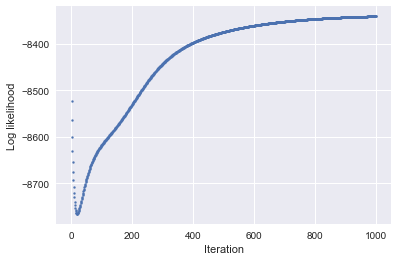

In [9]:
lls = gmm.lls
plt.scatter(np.arange(1, len(lls)), lls[1:], s=4)
plt.xlabel("Iteration")
plt.ylabel("Log likelihood")
plt.show()